In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
def plot_radar_chart(full_relearning, buffer_resampling):
    labels = ["        Time (s)", "GFLOPs", "Accuracy Δ (%)                ", "Samples Needed"]

    # Normalize data for better visualization
    max_values = [max(full_relearning[i], buffer_resampling[i]) for i in range(len(labels))]
    full_relearning_norm = [full_relearning[i] / max_values[i] for i in range(len(labels))]
    buffer_resampling_norm = [buffer_resampling[i] / max_values[i] for i in range(len(labels))]

    angles = [n / float(len(labels)) * 2 * np.pi for n in range(len(labels))]
    angles += angles[:1]

    full_relearning_norm += full_relearning_norm[:1]
    buffer_resampling_norm += buffer_resampling_norm[:1]

    _, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))

    ax.plot(angles, full_relearning_norm, linestyle='solid', label="Full Relearning", color="#E63946")
    ax.fill(angles, full_relearning_norm, alpha=0.3, color="#E63946")

    ax.plot(angles, buffer_resampling_norm, linestyle='solid', label="Buffer Resampling", color="#009E73")
    ax.fill(angles, buffer_resampling_norm, alpha=0.3, color="#009E73")

    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(labels)
    ax.set_yticks([0.25, 0.5, 0.75, 1])

    plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))
    plt.show()

In [6]:
def plot_table(data):
    df = pd.DataFrame(data)

    # Plot table with color gradient
    _, ax = plt.subplots(figsize=(6, 2))
    sns.heatmap(
        df.set_index("Metric"), annot=True, cmap="coolwarm", linewidths=0.5, fmt="g", ax=ax
    )
    plt.title("Comparison of Drift Adaptation Strategies")
    plt.show()

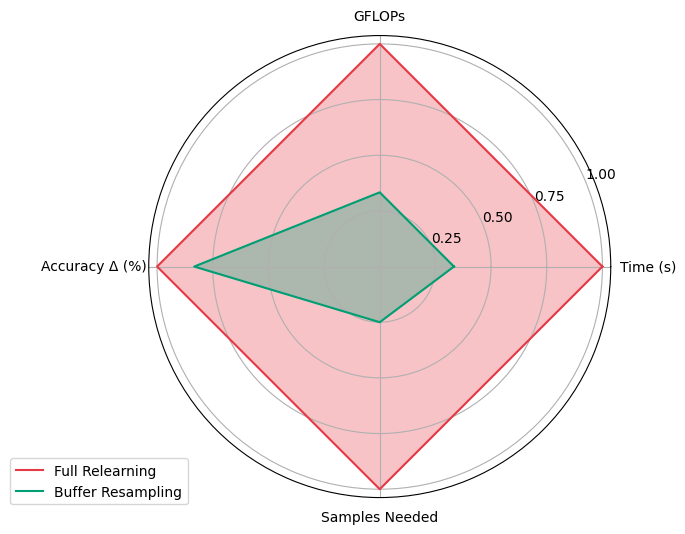

In [5]:
full_relearning = [3, 3, 1.2, 4]
buffer_resampling = [1, 1, 1, 1]
plot_radar_chart(full_relearning, buffer_resampling)

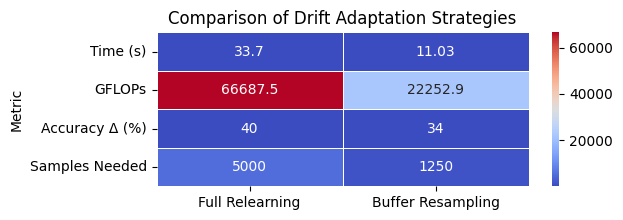

In [7]:
data = {
    "Metric": ["Time (s)", "GFLOPs", "Accuracy Δ (%)", "Samples Needed"],
    "Full Relearning": [33.70, 66687.50, 40, 5000],
    "Buffer Resampling": [11.03, 22252.87, 34, 1250],
}
plot_table(data)